Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
df = pd.read_csv("states_all.csv")

In [272]:
df.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [273]:
df.shape

(1715, 25)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [275]:
df=df[["STATE","YEAR","CAPITAL_OUTLAY_EXPENDITURE","INSTRUCTION_EXPENDITURE","OTHER_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE","GRADES_4_G","GRADES_8_G","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]]
df.isnull().sum()

STATE                              0
YEAR                               0
CAPITAL_OUTLAY_EXPENDITURE       440
INSTRUCTION_EXPENDITURE          440
OTHER_EXPENDITURE                491
SUPPORT_SERVICES_EXPENDITURE     440
GRADES_4_G                        83
GRADES_8_G                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

burada eksik verileri hızlıca dolduralım.

In [276]:
df["CAPITAL_OUTLAY_EXPENDITURE"]=df.groupby(by=["STATE"])["CAPITAL_OUTLAY_EXPENDITURE"].apply(lambda x: x.fillna(x.mean()))
df["INSTRUCTION_EXPENDITURE"]=df.groupby(by=["STATE"])["INSTRUCTION_EXPENDITURE"].apply(lambda x: x.fillna(x.mean()))
df["OTHER_EXPENDITURE"]=df.groupby(by=["STATE"])["OTHER_EXPENDITURE"].apply(lambda x: x.fillna(x.mean()))
df["SUPPORT_SERVICES_EXPENDITURE"]=df.groupby(by=["STATE"])["SUPPORT_SERVICES_EXPENDITURE"].apply(lambda x: x.fillna(x.mean()))
df.isnull().sum()

STATE                              0
YEAR                               0
CAPITAL_OUTLAY_EXPENDITURE        32
INSTRUCTION_EXPENDITURE           32
OTHER_EXPENDITURE                 32
SUPPORT_SERVICES_EXPENDITURE      32
GRADES_4_G                        83
GRADES_8_G                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [277]:
df["AVG_MATH_4_SCORE"]=df.groupby(by=["STATE"])["AVG_MATH_4_SCORE"].apply(lambda x: x.fillna(x.mean()))
df["AVG_MATH_8_SCORE"]=df.groupby(by=["STATE"])["AVG_MATH_8_SCORE"].apply(lambda x: x.fillna(x.mean()))
df["AVG_READING_4_SCORE"]=df.groupby(by=["STATE"])["AVG_READING_4_SCORE"].apply(lambda x: x.fillna(x.mean()))
df["AVG_READING_8_SCORE"]=df.groupby(by=["STATE"])["AVG_READING_8_SCORE"].apply(lambda x: x.fillna(x.mean()))
df.isnull().sum()

STATE                            0
YEAR                             0
CAPITAL_OUTLAY_EXPENDITURE      32
INSTRUCTION_EXPENDITURE         32
OTHER_EXPENDITURE               32
SUPPORT_SERVICES_EXPENDITURE    32
GRADES_4_G                      83
GRADES_8_G                      83
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              0
dtype: int64

In [278]:
df.dropna(inplace=True)

In [279]:
df.shape[0]

1632

In [280]:
df["agr_ort"]=((df["AVG_MATH_4_SCORE"]*df["GRADES_4_G"])+(df["AVG_MATH_8_SCORE"]+df["GRADES_8_G"])+(df["AVG_READING_4_SCORE"]*df["GRADES_4_G"])+(df["AVG_READING_8_SCORE"]+df["GRADES_8_G"]))/(df["GRADES_4_G"]+df["GRADES_8_G"])

In [281]:
df.corr()

,YEAR,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE,OTHER_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,agr_ort
YEAR,1.000000,0.102636,0.142227,0.111807,0.154160,0.053736,0.072686,0.182274,0.177536,0.103069,0.042634,-0.128489
CAPITAL_OUTLAY_EXPENDITURE,0.102636,1.000000,0.904505,0.923772,0.925981,0.911422,0.918030,0.007499,-0.040342,-0.063164,-0.106350,-0.016328
INSTRUCTION_EXPENDITURE,0.142227,0.904505,1.000000,0.905292,0.977345,0.870670,0.879076,0.053851,0.008492,0.030642,-0.007356,0.013411
OTHER_EXPENDITURE,0.111807,0.923772,0.905292,1.000000,0.948203,0.948561,0.951326,-0.026529,-0.078070,-0.073679,-0.108051,-0.030855
SUPPORT_SERVICES_EXPENDITURE,0.154160,0.925981,0.977345,0.948203,1.000000,0.907688,0.916454,0.052786,0.004362,0.012256,-0.019474,0.006792
GRADES_4_G,0.053736,0.911422,0.870670,0.948561,0.907688,1.000000,0.997349,-0.048765,-0.082309,-0.100315,-0.114800,-0.026110
GRADES_8_G,0.072686,0.918030,0.879076,0.951326,0.916454,0.997349,1.000000,-0.036288,-0.070971,-0.088546,-0.106925,-0.053956
AVG_MATH_4_SCORE,0.182274,0.007499,0.053851,-0.026529,0.052786,-0.048765,-0.036288,1.000000,0.890222,0.803658,0.775294,0.489509
AVG_MATH_8_SCORE,0.177536,-0.040342,0.008492,-0.078070,0.004362,-0.082309,-0.070971,0.890222,1.000000,0.809835,0.850531,0.425556
AVG_READING_4_SCORE,0.103069,-0.063164,0.030642,-0.073679,0.012256,-0.100315,-0.088546,0.803658,0.809835,1.000000,0.928330,0.460394


<AxesSubplot:>

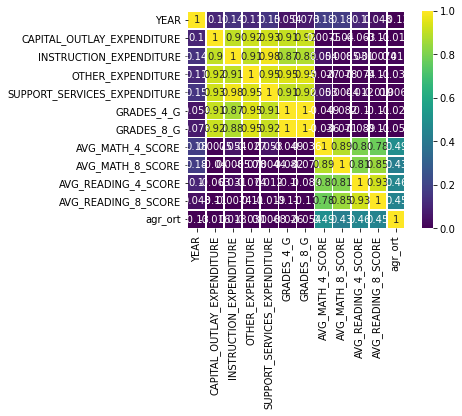

In [282]:
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')

Yeni değişkenimiz korele gözükmemektedir.

In [283]:
df.head(2)

,STATE,YEAR,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE,OTHER_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,agr_ort
0,ALABAMA,1992,174053.0,1481703.0,461308.125000,735036.0,57948.0,58025.0,208.000000,252.0,207.000000,255.000000,208.367267
1,ALASKA,1992,37451.0,498362.0,59821.916667,350902.0,9748.0,8789.0,234.777778,280.0,209.888889,258.333333,234.812915


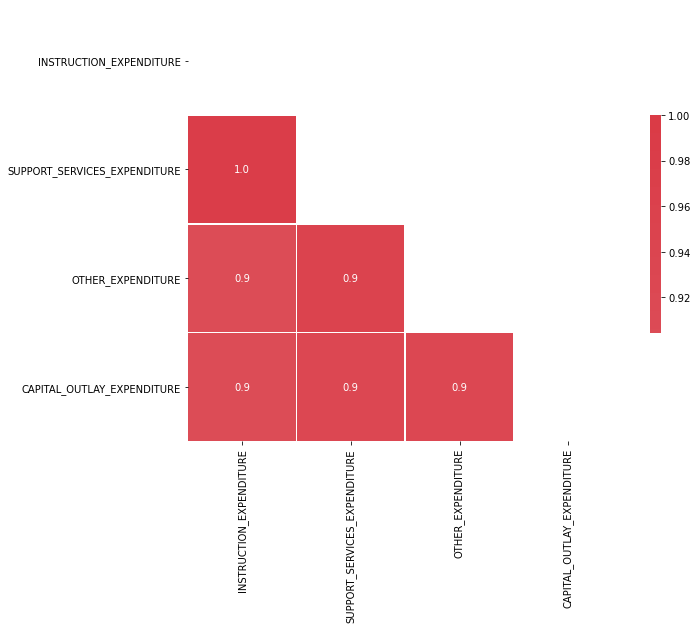

In [284]:
correlation_exp=df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]] 
# Korelasyon Matrisi
corr = correlation_exp.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, fmt= '.1f', cbar_kws={"shrink": .5})
plt.show()

Yukarıda harcama çeşitleri birbiri ile korele gözükmemektedir. Aşağıda PCA yapalım.

In [291]:
X = df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]] 
X = StandardScaler().fit_transform(X)
X

array([[-0.53065178, -0.59049564,  0.05946761, -0.56111152],
       [-0.68943536, -0.70696473, -0.70193435, -0.66619437],
       [-0.53804646, -0.50781445, -0.18118966, -0.22643521],
       ...,
       [-0.67753614, -0.70573783, -0.74820968, -0.55952748],
       [-0.67753614, -0.70573783, -0.74820968, -0.55952748],
       [-0.67753614, -0.70573783, -0.74820968, -0.55952748]])

In [292]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=4)  
X_PCA  = pca.fit_transform(X)  
explained_variance = pca.explained_variance_ratio_ 
pca.explained_variance_ratio_ 

array([0.9482243 , 0.02871354, 0.01948216, 0.00358   ])

%94 ü bu ilk bileşen sayesinde varyansı açıklıyor.

In [287]:
#pca = PCA(n_components = 4)
 
#pca.fit(X)
 
#principal_components = pca.transform(X)
 
#percentage_var_explained = pca.explained_variance_ratio_;  
#cum_var_explained=np.cumsum(percentage_var_explained)
 
#print(pca.explained_variance_ratio_,"yuzde = ", sum(pca.explained_variance_ratio_)*100)

#plot PCA spectrum   
#plt.figure(1,figsize=(6,4))
#plt.clf()  
#plt.plot(cum_var_explained,linewidth=2)  
#plt.axis('tight')  
#plt.grid() 
#plt.xlabel('n_components') 
#plt.ylabel('Cumulative_Variance_explained')  
#plt.show()

In [302]:
data=pd.DataFrame(X_PCA).head()
 
data.head()

,0,1,2,3
0,-0.812879,-0.223112,0.446328,0.197229
1,-1.382433,-0.006175,-0.022097,0.000566
2,-0.728819,-0.303800,0.066312,0.060022
3,-1.100333,-0.135803,0.181944,0.107097
4,4.446215,-0.772311,2.744944,0.692066


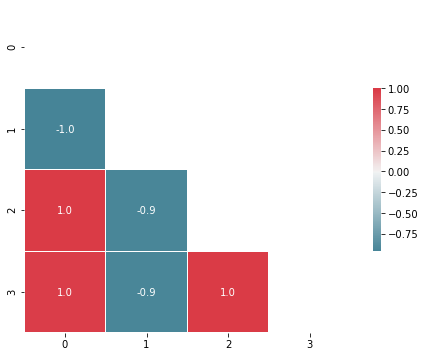

In [289]:
#Bileşenler arası korelasyon matrisi. Bileşenler arası korelasyon yüksek. Zaten biz burada ilk bileşen %94 olduğu için ilk 
#bileşeni alacağız.
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, fmt= '.1f', cbar_kws={"shrink": .5})
plt.show()

Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

In [298]:
df['PCA_1'] = X_PCA[:, 0]

In [303]:
df.head(10)

,STATE,YEAR,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE,OTHER_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,agr_ort,PCA_1
0,ALABAMA,1992,174053.0,1481703.0,4.613081e+05,735036.0,57948.0,58025.0,208.000000,252.0,207.000000,255.000000,208.367267,-0.812879
1,ALASKA,1992,37451.0,498362.0,5.982192e+04,350902.0,9748.0,8789.0,234.777778,280.0,209.888889,258.333333,234.812915,-1.382433
2,ARIZONA,1992,609114.0,1435908.0,3.344099e+05,1007732.0,55433.0,49081.0,215.000000,265.0,209.000000,258.636364,225.828862,-0.728819
3,ARKANSAS,1992,145212.0,964323.0,2.537191e+05,483488.0,34632.0,36011.0,210.000000,256.0,211.000000,258.818182,207.417703,-1.100333
4,CALIFORNIA,1992,2044688.0,14358922.0,2.907487e+06,8520926.0,418418.0,363296.0,208.000000,261.0,202.000000,255.000000,220.385573,4.446215
5,COLORADO,1992,364760.0,1642466.0,2.540382e+05,1035970.0,50648.0,45025.0,221.000000,272.0,217.000000,267.600000,232.818179,-0.876718
6,CONNECTICUT,1992,48542.0,2148041.0,2.601469e+05,1142600.0,38058.0,33691.0,227.000000,274.0,222.000000,270.181818,239.110903,-0.934124
7,DELAWARE,1992,30595.0,372722.0,6.566908e+04,194915.0,8272.0,8012.0,218.000000,263.0,213.000000,263.636364,219.957175,-1.413670
8,DISTRICT_OF_COLUMBIA,1992,47272.0,329160.0,3.911088e+04,316679.0,5832.0,5000.0,193.000000,235.0,188.000000,242.818182,206.099503,-1.417165
9,FLORIDA,1992,1667826.0,5166374.0,1.351972e+06,3410440.0,164416.0,142372.0,214.000000,260.0,208.000000,261.272727,227.091077,1.305789


In [304]:
correlation=df[["agr_ort", "PCA_1"]] 
correlation.corr()

,agr_ort,PCA_1
agr_ort,1.000000,-0.006827
PCA_1,-0.006827,1.000000


Hiç bir korelasyon yok gözüküyor.

Harcama kalemleri yerine ilk bileşeni tercih ederdim. Çünkü ilk bileşen varyansın 94 ucunu acıklıyor. Harcama türleri de kendi içinde yüksek kolere olduğundan ilk bileşeni seçerdim.